<a href="https://colab.research.google.com/github/Flaviasoz/social-media-productivity/blob/main/limpeza_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1: Limpeza e Pré-processamento de Dados

**Objetivo**: Preparar os dados brutos para análise  
**Dataset**: social_media_productivity.csv  
**Autor**: Flávia Souza e Vinicius Loeblein

## 1. Configuração Inicial

In [50]:
!apt-get install -y wkhtmltopdf
!pip install -q kagglehub pdfkit
!pip install weasyprint

import kagglehub
import pdfkit
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from weasyprint import HTML

plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
%matplotlib inline

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.6-2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [39]:
path = kagglehub.dataset_download("mahdimashayekhi/social-media-vs-productivity")

# Verifica os arquivos disponíveis
print("Arquivos disponíveis:", os.listdir(path))

# Caminho para o CSV
csv_path = os.path.join(path, "social_media_vs_productivity.csv")

# Carrega os dados com pandas
df = pd.read_csv(csv_path)
print(f"Dimensões originais: {df.shape}")
df.head(3)

Arquivos disponíveis: ['social_media_vs_productivity.csv']
Dimensões originais: (30000, 19)


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944


## 2. Inspeção Inicial

In [40]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30000.0,NaN,NaN,NaN,41.486867,13.835221,18.0,30.0,41.0,53.0,65.0
gender,30000,3,Male,14452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_type,30000,6,Education,5055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daily_social_media_time,27235.0,NaN,NaN,NaN,3.113418,2.074813,0.0,1.639566,3.025913,4.368917,17.973256
social_platform_preference,30000,5,TikTok,6096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_notifications,30000.0,NaN,NaN,NaN,59.958767,7.723772,30.0,55.0,60.0,65.0,90.0
work_hours_per_day,30000.0,NaN,NaN,NaN,6.990792,1.997736,0.0,5.643771,6.990641,8.354725,12.0
perceived_productivity_score,28386.0,NaN,NaN,NaN,5.510488,2.02347,2.000252,3.757861,5.525005,7.265776,8.999376
actual_productivity_score,27635.0,NaN,NaN,NaN,4.951805,1.883378,0.296812,3.373284,4.951742,6.526342,9.846258
stress_level,28096.0,NaN,NaN,NaN,5.514059,2.866344,1.0,3.0,6.0,8.0,10.0


## 3. Tratamento de Valores Ausentes

### Visualização de valores ausentes

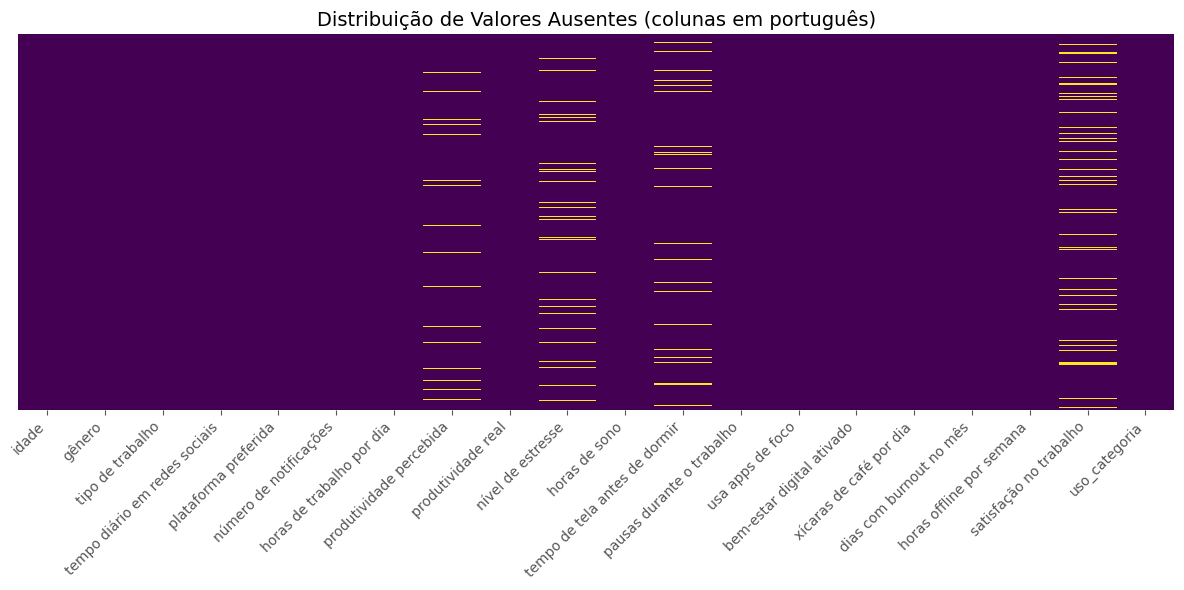

                     Coluna (PT)  Valores Ausentes
3         satisfação no trabalho              2722
2  tempo de tela antes de dormir              2205
1              nível de estresse              1894
0        produtividade percebida              1609


In [61]:
# Dicionário de tradução das colunas
colunas_pt = {
    'age': 'idade',
    'gender': 'gênero',
    'job_type': 'tipo de trabalho',
    'daily_social_media_time': 'tempo diário em redes sociais',
    'social_platform_preference': 'plataforma preferida',
    'number_of_notifications': 'número de notificações',
    'work_hours_per_day': 'horas de trabalho por dia',
    'perceived_productivity_score': 'produtividade percebida',
    'actual_productivity_score': 'produtividade real',
    'stress_level': 'nível de estresse',
    'sleep_hours': 'horas de sono',
    'screen_time_before_sleep': 'tempo de tela antes de dormir',
    'breaks_during_work': 'pausas durante o trabalho',
    'uses_focus_apps': 'usa apps de foco',
    'has_digital_wellbeing_enabled': 'bem-estar digital ativado',
    'coffee_consumption_per_day': 'xícaras de café por dia',
    'days_feeling_burnout_per_month': 'dias com burnout no mês',
    'weekly_offline_hours': 'horas offline por semana',
    'job_satisfaction_score': 'satisfação no trabalho'
}

df_visual = df.copy()
df_visual.columns = [colunas_pt.get(col, col) for col in df.columns]

plt.figure(figsize=(12,6))
sns.heatmap(df_visual.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Distribuição de Valores Ausentes (colunas em português)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

faltantes = df.isnull().sum()
faltantes = faltantes[faltantes > 0]
faltantes_df = pd.DataFrame({
    'Coluna (PT)': [colunas_pt.get(col, col) for col in faltantes.index],
    'Valores Ausentes': faltantes.values
})
faltantes_df = faltantes_df.sort_values(by='Valores Ausentes', ascending=False)

print(faltantes_df)

### Tratamento de dados

In [62]:
# Preenchimento da coluna 'age' com a mediana
df['age'] = df['age'].fillna(df['age'].median())

# Preenchimento da coluna 'daily_social_media_time' com a média
df['daily_social_media_time'] = df['daily_social_media_time'].fillna(
    df['daily_social_media_time'].mean()
)

# Preenchimento de outras colunas numéricas com a média (opcional)
df['sleep_hours'] = df['sleep_hours'].fillna(df['sleep_hours'].mean())
df['actual_productivity_score'] = df['actual_productivity_score'].fillna(
    df['actual_productivity_score'].mean()
)

# Remoção de registros com mais de 50% de valores ausentes
df.dropna(thresh=df.shape[1] * 0.5, inplace=True)

# Verificação após tratamento
print("Valores ausentes restantes por coluna:")
print(df.isnull().sum())

Valores ausentes restantes por coluna:
age                                  0
gender                               0
job_type                             0
daily_social_media_time              0
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1609
actual_productivity_score            0
stress_level                      1894
sleep_hours                          0
screen_time_before_sleep          2205
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2722
uso_categoria                        0
dtype: int64


## 4. Tratamento de Outliers

Outliers detectados: 213


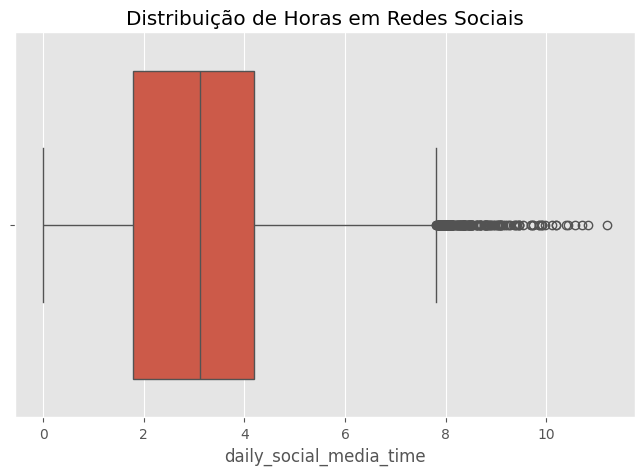

In [59]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]

outliers_sm = detect_outliers('daily_social_media_time')
print(f"Outliers detectados: {len(outliers_sm)}")

plt.figure(figsize=(8,5))
sns.boxplot(x=df['daily_social_media_time'])
plt.title('Distribuição de Horas em Redes Sociais')
plt.savefig("boxplot_redes_sociais.png")

df = df[df['daily_social_media_time'] <= 12]

## 5. Engenharia de Features

In [44]:
conditions = [
    (df['daily_social_media_time'] < 2),
    (df['daily_social_media_time'] >= 2) & (df['daily_social_media_time'] < 4),
    (df['daily_social_media_time'] >= 4)
]

choices = ['baixo', 'moderado', 'alto']

df['uso_categoria'] = np.select(conditions, choices, default='não definido')

## 6. Exportação dos Dados Processados

In [45]:
print(f"Dimensões finais: {df.shape}")
df.head(3)

# Salvar para continuar em outro notebook
df.to_csv('processed_data.csv', index=False)
print("Dados processados salvos com sucesso!")

print("✅ Valores ausentes tratados")
print("✅ Outliers identificados e removidos")
print("✅ Novas features criadas")
print("✅ Dados exportados para próxima etapa")

Dimensões finais: (29860, 20)
Dados processados salvos com sucesso!
✅ Valores ausentes tratados
✅ Outliers identificados e removidos
✅ Novas features criadas
✅ Dados exportados para próxima etapa


## 7. Geração de Relatório PDF

In [63]:
df_html = df.head(3).to_html(index=False, classes="tabela-dados")

html_content = f"""
<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
    <style>
        body {{
            font-family: Arial, sans-serif;
            padding: 20px;
        }}
        h1, h2 {{
            color: #2c3e50;
        }}
        table.tabela-dados {{
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
            font-size: 14px;
        }}
        .tabela-dados th {{
            background-color: #f2f2f2;
            color: #333;
            padding: 8px;
            border: 1px solid #ddd;
        }}
        .tabela-dados td {{
            padding: 8px;
            border: 1px solid #ddd;
        }}
        img {{
            max-width: 100%;
            margin: 20px 0;
        }}
        ul {{
            list-style: none;
            padding-left: 0;
        }}
        ul li::before {{
            content: "✅ ";
            color: green;
        }}
    </style>
</head>
<body>

<h1>Relatório: Limpeza e Pré-processamento de Dados</h1>

<h2>Dimensões dos dados</h2>
<p>Dados finais: {df.shape}</p>

<h2>Primeiros registros</h2>
{df_html}

<h2>Distribuição de Valores Ausentes</h2>
<img src="valores_ausentes.png" alt="Heatmap de valores ausentes"/>

<h2>Boxplot: Horas em Redes Sociais</h2>
<img src="boxplot_redes_sociais.png" width="600"/>


<h2>Outliers</h2>
<p>{len(outliers_sm)} outliers detectados em <code>daily_social_media_time</code></p>

<h2>Checklist de Qualidade</h2>
<ul>
  <li>Valores ausentes tratados</li>
  <li>Outliers identificados e removidos</li>
  <li>Novas features criadas</li>
  <li>Dados exportados para próxima etapa</li>
</ul>

</body>
</html>
"""

with open("rel_limpeza_dados.html", "w", encoding="utf-8") as f:
    f.write(html_content)

HTML("rel_limpeza_dados.html").write_pdf("rel_limpeza_dados.pdf")
files.download("rel_limpeza_dados.pdf")

DEBUG:fontTools.ttLib.ttFont:Reading 'maxp' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'maxp' table
DEBUG:fontTools.subset.timer:Took 0.002s to load 'maxp'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'maxp'
INFO:fontTools.subset:maxp pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'cmap' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'cmap' table
DEBUG:fontTools.ttLib.ttFont:Reading 'post' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'post' table
DEBUG:fontTools.subset.timer:Took 0.005s to load 'cmap'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'cmap'
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:fpgm dropped
INFO:fontTools.subset:prep dropped
INFO:fontTools.subset:cvt  dropped
INFO:fontTools.subset:kern dropped
DEBUG:fontTools.subset.timer:Took 0.000s to load 'post'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'post'
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:GPOS dropped
INFO:fontTools.subset:GSUB dropped
DEBUG:f

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>